In [87]:
import pandas as pd
import plotly.graph_objects as go
import cufflinks as cf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

df=pd.read_csv(f'../data/processed/df002.csv')

df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df['carat_category'] = df['carat_category'].astype('category')



In [88]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int,carat_category
0,0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,4,1,5,"(1.06, 1.92]"
1,1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,3,5,"(0.196, 1.06]"
2,2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,1,4,4,"(0.196, 1.06]"
3,3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,7,2,"(0.196, 1.06]"
4,4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,5,4,2,"(0.196, 1.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,5,4,4,"(1.06, 1.92]"
40451,40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,2,5,3,"(1.92, 2.78]"
40452,40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5,3,2,"(0.196, 1.06]"
40453,40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,5,1,4,"(0.196, 1.06]"


In [89]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      40455 non-null  int64   
 1   carat           40455 non-null  float64 
 2   cut             40455 non-null  category
 3   color           40455 non-null  category
 4   clarity         40455 non-null  category
 5   depth           40455 non-null  float64 
 6   table           40455 non-null  float64 
 7   price           40455 non-null  int64   
 8   x               40455 non-null  float64 
 9   y               40455 non-null  float64 
 10  z               40455 non-null  float64 
 11  cut_int         40455 non-null  int64   
 12  color_int       40455 non-null  int64   
 13  clarity_int     40455 non-null  int64   
 14  carat_category  40455 non-null  category
dtypes: category(4), float64(6), int64(5)
memory usage: 3.6 MB


In [103]:
multi=df.pivot_table(index=['carat_category'],columns=['cut','color','clarity'],values=['price'])

In [105]:
multi[multi.columns[1]]

carat_category
(0.196, 1.06]    1619.666667
(1.06, 1.92]             NaN
(1.92, 2.78]             NaN
(2.78, 3.64]             NaN
(3.64, 4.5]              NaN
Name: (price, Fair, D, IF), dtype: float64

In [177]:
rank=1000

dftop=df.sort_values(by='price',ascending=False,ignore_index=True).iloc[:rank,:]
dftop[f'TOP {rank}']=f'TOP {rank}'
dfbottom=df.sort_values(by='price',ascending=True,ignore_index=True).iloc[:rank,:]
dfbottom[f'BOTTOM {rank}']=f'BOTTOM {rank}'
dfall=pd.concat([dftop.reset_index(drop=True),
           dfbottom.reset_index(drop=True)], axis=0)

dfall['TOP BOTTOM']=dfall[f'TOP {rank}']

dfall['TOP BOTTOM'].fillna(f'BOTTOM {rank}',inplace=True)
dfall




,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int,carat_category,TOP 1000,BOTTOM 1000,TOP BOTTOM
0,7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,4,2,5,"(1.92, 2.78]",TOP 1000,NaN,TOP 1000
1,3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3,4,2,"(1.92, 2.78]",TOP 1000,NaN,TOP 1000
2,29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,5,4,8,"(1.06, 1.92]",TOP 1000,NaN,TOP 1000
3,25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,4,2,2,"(1.92, 2.78]",TOP 1000,NaN,TOP 1000
4,618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91,4,2,4,"(1.92, 2.78]",TOP 1000,NaN,TOP 1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17564,0.30,Ideal,G,SI1,61.0,58.0,477,4.29,4.36,2.64,5,4,2,"(0.196, 1.06]",NaN,BOTTOM 1000,BOTTOM 1000
996,13095,0.34,Very Good,E,SI2,61.7,61.0,477,4.47,4.51,2.77,3,6,3,"(0.196, 1.06]",NaN,BOTTOM 1000,BOTTOM 1000
997,37369,0.34,Premium,E,SI2,61.7,58.0,477,4.50,4.54,2.79,4,6,3,"(0.196, 1.06]",NaN,BOTTOM 1000,BOTTOM 1000
998,17109,0.32,Very Good,G,SI1,62.8,56.0,477,4.34,4.36,2.73,3,4,2,"(0.196, 1.06]",NaN,BOTTOM 1000,BOTTOM 1000


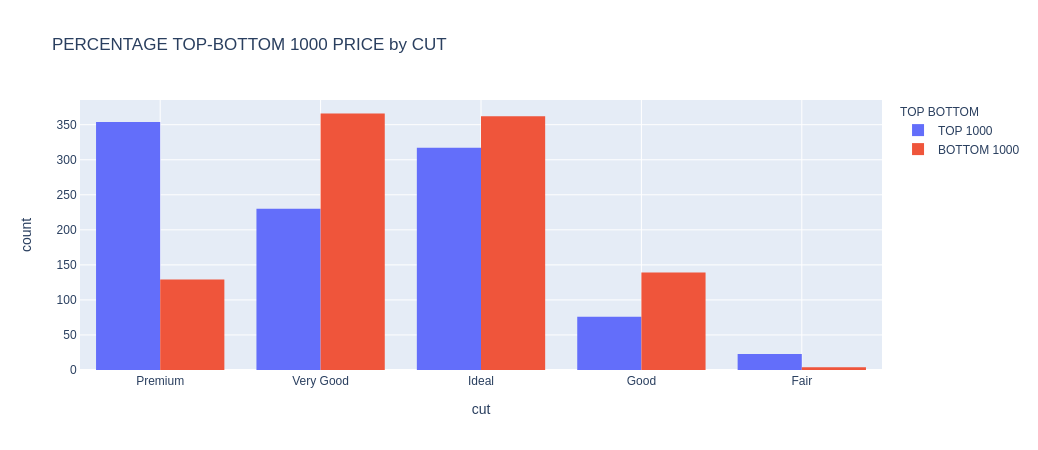

In [186]:
fig=px.histogram(dfall, x='cut',orientation='v',title=f'PERCENTAGE TOP-BOTTOM {rank} PRICE by CUT',color='TOP BOTTOM',barmode='group')
fig.show()


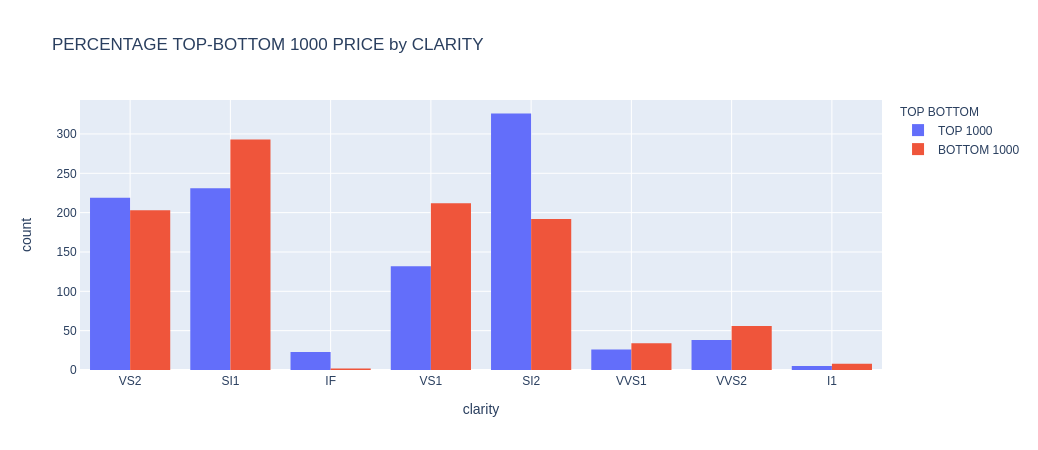

In [187]:
fig=px.histogram(dfall, x='clarity',orientation='v',title=f'PERCENTAGE TOP-BOTTOM {rank} PRICE by CLARITY',color='TOP BOTTOM',barmode='group')
fig.show()


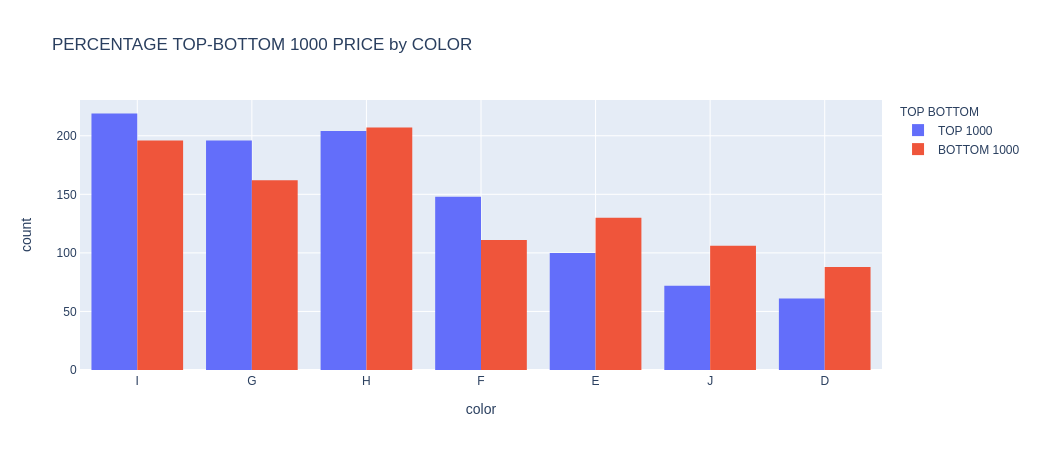

In [188]:
fig=px.histogram(dfall, x='color',orientation='v',title=f'PERCENTAGE TOP-BOTTOM {rank} PRICE by COLOR',color='TOP BOTTOM',barmode='group')
fig.show()


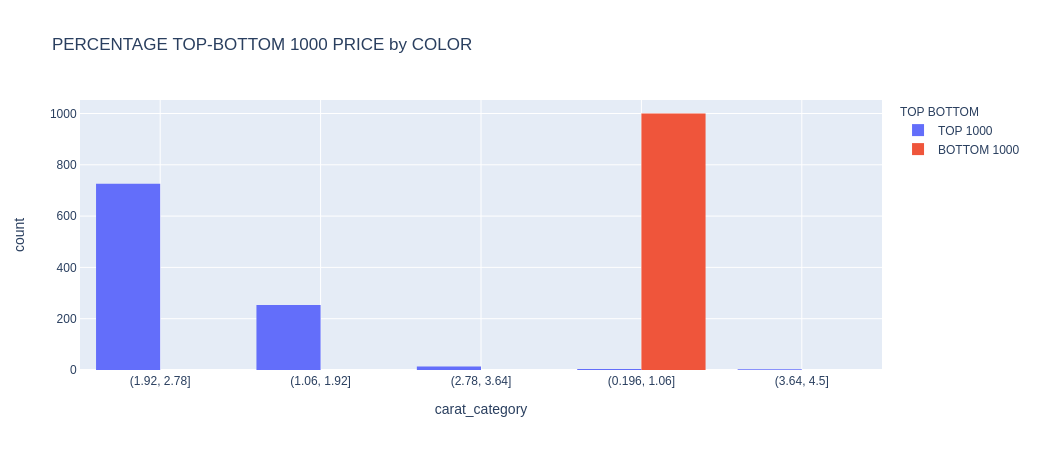

In [189]:
fig=px.histogram(dfall, x='carat_category',orientation='v',title=f'PERCENTAGE TOP-BOTTOM {rank} PRICE by COLOR',color='TOP BOTTOM',barmode='group')
fig.show()

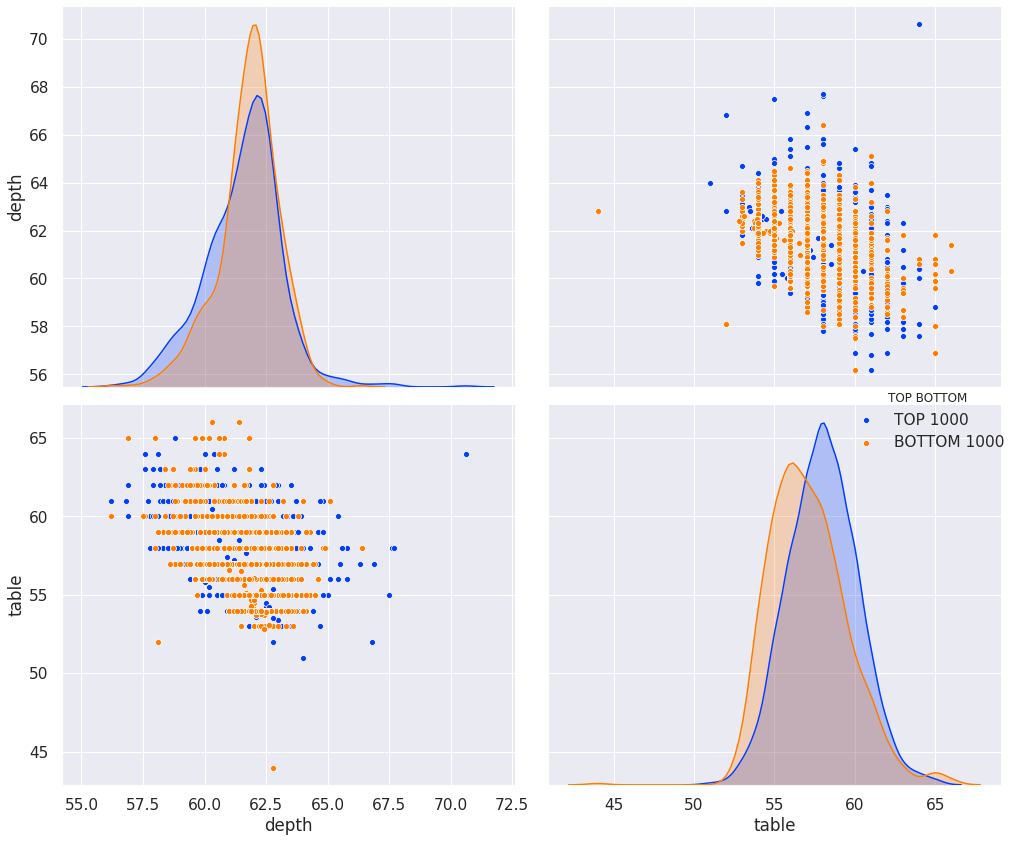

In [218]:
sns.set(font_scale=1.4)
sns.pairplot(dfall[['depth','TOP BOTTOM','table']],hue='TOP BOTTOM',height=6, palette='bright', diag_kind='kde')
plt.tight_layout()

